In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer

In [2]:
hr = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/human-resources-analytics/HR_comma_sep.csv")
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object) )],
                             remainder='passthrough',
                             verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)
scl_x = MinMaxScaler()
X_trn_scl, X_tst_scl = scl_x.fit_transform(X_train), scl_x.transform(X_test)

In [3]:
intializer = tf.keras.initializers.GlorotUniform(seed = 25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(14, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(9, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(4, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(1, activation='sigmoid',
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               loss=tf.keras.losses.BinaryCrossentropy())
history = model.fit(X_trn_scl, y_train,validation_data=(X_tst_scl,y_test), epochs=500)

Epoch 1/500
328/328 [==============================] - 3s 5ms/step - loss: 0.5951 - val_loss: 0.5197
Epoch 2/500
328/328 [==============================] - 1s 4ms/step - loss: 0.4864 - val_loss: 0.4487
Epoch 3/500
328/328 [==============================] - 1s 3ms/step - loss: 0.4281 - val_loss: 0.3978
Epoch 4/500
328/328 [==============================] - 1s 4ms/step - loss: 0.3781 - val_loss: 0.3461
Epoch 5/500
328/328 [==============================] - 1s 3ms/step - loss: 0.3325 - val_loss: 0.3058
Epoch 6/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2999 - val_loss: 0.2808
Epoch 7/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2782 - val_loss: 0.2658
Epoch 8/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2649 - val_loss: 0.2535
Epoch 9/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2525 - val_loss: 0.2481
Epoch 10/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2428 - val_lo

In [4]:
y_pred_prob = model.predict(X_tst_scl)
print(log_loss(y_test, y_pred_prob))

141/141 [==============================] - 1s 2ms/step
0.12701557883080947


In [5]:
y_pred = np.where( y_pred_prob >= 0.5, 1, 0 )
print(accuracy_score(y_test, y_pred))

0.9688819737719493


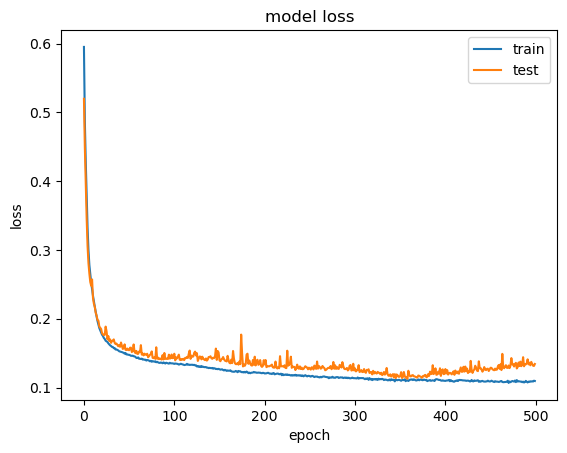

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### Early Stopping

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
early = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=2,
        restore_best_weights=True)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(14, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(9, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(4, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(1, activation='sigmoid',
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               loss=tf.keras.losses.BinaryCrossentropy())
history = model.fit(X_trn_scl, y_train,validation_data=(X_tst_scl,y_test),
                    callbacks=[early], epochs=500)

Epoch 1/500
328/328 [==============================] - 2s 4ms/step - loss: 0.5951 - val_loss: 0.5197
Epoch 2/500
328/328 [==============================] - 1s 3ms/step - loss: 0.4864 - val_loss: 0.4487
Epoch 3/500
328/328 [==============================] - 1s 3ms/step - loss: 0.4281 - val_loss: 0.3978
Epoch 4/500
328/328 [==============================] - 1s 3ms/step - loss: 0.3781 - val_loss: 0.3461
Epoch 5/500
328/328 [==============================] - 1s 3ms/step - loss: 0.3325 - val_loss: 0.3058
Epoch 6/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2999 - val_loss: 0.2808
Epoch 7/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2782 - val_loss: 0.2658
Epoch 8/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2649 - val_loss: 0.2535
Epoch 9/500
328/328 [==============================] - 1s 4ms/step - loss: 0.2525 - val_loss: 0.2481
Epoch 10/500
328/328 [==============================] - 1s 3ms/step - loss: 0.2428 - val_lo

In [9]:
y_pred_prob = model.predict(X_tst_scl)
print(log_loss(y_test, y_pred_prob))

141/141 [==============================] - 1s 4ms/step
0.1549515626759318


In [10]:
y_pred = np.where( y_pred_prob >= 0.5, 1, 0 )
print(accuracy_score(y_test, y_pred))

0.953322960657924


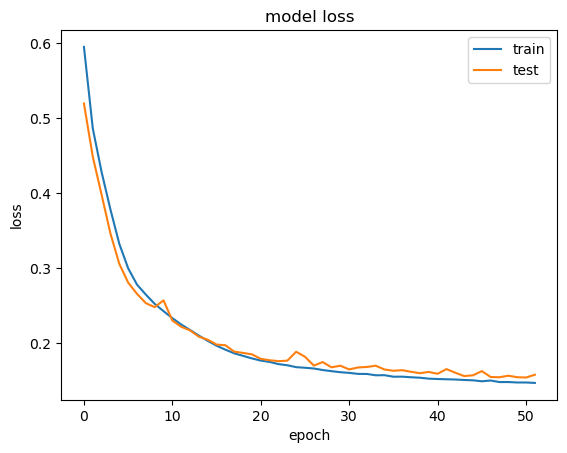

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Reduce LR on Plateau

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(14, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(9, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(4, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(1, activation='sigmoid',
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
               loss=tf.keras.losses.BinaryCrossentropy())
history = model.fit(X_trn_scl, y_train,validation_data=(X_tst_scl,y_test),
                    callbacks=[reduce_lr], epochs=200)

Epoch 1/200
328/328 [==============================] - 2s 4ms/step - loss: 0.5523 - val_loss: 0.5487 - lr: 0.1000
Epoch 2/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5505 - val_loss: 0.5553 - lr: 0.1000
Epoch 3/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5503 - val_loss: 0.5501 - lr: 0.1000
Epoch 4/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5507 - val_loss: 0.5499 - lr: 0.1000
Epoch 5/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5510 - val_loss: 0.5492 - lr: 0.1000
Epoch 6/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5508 - val_loss: 0.5497 - lr: 0.1000
Epoch 7/200
328/328 [==============================] - 2s 5ms/step - loss: 0.5492 - val_loss: 0.5486 - lr: 0.0200
Epoch 8/200
328/328 [==============================] - 1s 4ms/step - loss: 0.5490 - val_loss: 0.5487 - lr: 0.0200
Epoch 9/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5488 - val_

In [16]:
y_pred_prob = model.predict(X_tst_scl)
print("Log Loss =",log_loss(y_test, y_pred_prob))
y_pred = y_pred_prob.argmax(axis=1)
print("Accuracy =",accuracy_score(y_test, y_pred))

141/141 [==============================] - 0s 2ms/step
Log Loss = 0.5485738174086906
Accuracy = 0.762169370971327


In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_trn_scl.shape[1],)),
                             tf.keras.layers.Dense(14, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(9, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(4, activation='relu',
                                                   kernel_initializer=intializer),
                             tf.keras.layers.Dense(1, activation='sigmoid',
                                                   kernel_initializer=intializer)])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
               loss=tf.keras.losses.BinaryCrossentropy())
history = model.fit(X_trn_scl, y_train,validation_data=(X_tst_scl,y_test),
                    callbacks=[reduce_lr, early], epochs=200)

Epoch 1/200
328/328 [==============================] - 2s 4ms/step - loss: 0.5523 - val_loss: 0.5487 - lr: 0.1000
Epoch 2/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5505 - val_loss: 0.5553 - lr: 0.1000
Epoch 3/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5503 - val_loss: 0.5501 - lr: 0.1000
Epoch 4/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5507 - val_loss: 0.5499 - lr: 0.1000
Epoch 5/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5510 - val_loss: 0.5492 - lr: 0.1000
Epoch 6/200
328/328 [==============================] - 1s 3ms/step - loss: 0.5508 - val_loss: 0.5497 - lr: 0.1000
Epoch 6: early stopping


In [18]:
y_pred_prob = model.predict(X_tst_scl)
print("Log Loss =",log_loss(y_test, y_pred_prob))
y_pred = y_pred_prob.argmax(axis=1)
print("Accuracy =",accuracy_score(y_test, y_pred))

141/141 [==============================] - 0s 3ms/step
Log Loss = 0.5486842427019676
Accuracy = 0.762169370971327
